In [1]:
using Pkg
Pkg.instantiate()
using TAMode
using Plots
using StaticArrays
using LinearAlgebra

In [27]:
CompParams = ones(12) * 0.5;
tps = @SVector Float64[0.0001, 0.01, 0.1, 1];
r = 1:100;

In [28]:
pp = TAMode.compParamm(CompParams)
pY = TAMode.compTAM(tps, pp)
cplot = Array{Float64}(undef, length(tps), length(tps), 100)

4×4×100 Array{Float64,3}:
[:, :, 1] =
 5.0e-324      1.5e-323      2.0e-323      2.5e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310
 1.0e-323      2.0e-323      2.5e-323      2.0e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310

[:, :, 2] =
 2.5e-323      2.5e-323      3.5e-323      4.0e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310
 2.5e-323      3.0e-323      4.0e-323      4.4e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310

[:, :, 3] =
 5.0e-323      4.4e-323      5.0e-323      5.0e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310
 5.0e-323      4.4e-323      5.0e-323      4.0e-323
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310

...

[:, :, 98] =
 1.03e-321     1.023e-321    1.033e-321    1.042e-321
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310
 1.02e-321     1.03e-321     1.04e-321     1.047e-321
 6.90986e-310  6.90986e-310  6.90986e-310  6.90986e-310

[:, :, 99] =
 1.047e-321    1.047e-321    1.057e

In [29]:
for rr = 1:100
    for t = 1:length(tps)
        pYdata = view(pY, t, :, rr)
        cplot[t, :, rr] .= dot(pYdata, TAMode.pYc)
    end
end

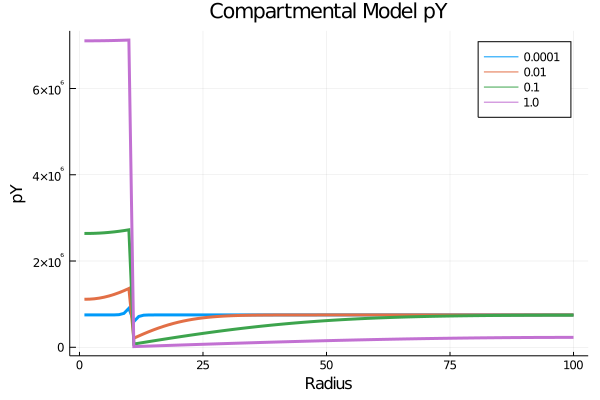

In [30]:
plotpY = view(cplot, 1, 1, :)
plot(r, plotpY, title = "Compartmental Model pY", label = tps[1], lw = 3)

if length(tps) > 1
    for tt = 2:length(tps)
        plotpY = view(cplot, tt, tt, :)
        plot!(r, plotpY, label = tps[tt], lw = 3)
    end
end
xlabel!("Radius")
ylabel!("pY")